In [1]:
import json

import pandas as pd
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_community.chat_models import GigaChat

JSON_PATH = 'case_2_reference_without_resume_sorted.json'
TOKEN_PATH = 'giga_token.json'

/Users/l.barabanshchikov/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
with open(TOKEN_PATH, 'r') as f:
    token = json.load(f)['token']

In [3]:
chat = GigaChat(credentials=token, verify_ssl_certs=False)

In [4]:
experienceItem_ = """Период работы {starts} - {ends} на позиции {position}.
Описывает свою деятельность как: ```{description}```"""

In [5]:
with open(JSON_PATH) as f:
    data = json.load(f)

In [6]:
summarized_exps = []

for resume in data['resumes']:
        exp_ = ''
        for i in resume['experienceItem']:
            exp_ += experienceItem_.format(
                starts=i['starts'],
                ends=i['ends'],
                position=i['position'],
                description=i['description']
            )

        messages = [
            SystemMessage(
                content="Посмотри на опыт человека как рекрутер. Суммаризуй опыт работы. Выдели ключевые достижения"
            ),
            HumanMessage(content=f"{exp_}"),
        ]

        summarized_exp = chat(messages).content
        
        summarized_exps.append(summarized_exp)

/Users/l.barabanshchikov/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(
Giga generation stopped with reason: blacklist
Giga generation stopped with reason: length
Giga generation stopped with reason: length
Giga generation stopped with reason: length
Giga generation stopped with reason: length
Giga generation stopped with reason: length
Giga generation stopped with reason: blacklist


In [10]:
import pandas as pd

exps = pd.Series(summarized_exps)
exps

0      Ключевые достижения:\n- Руководство командой р...
1      Ключевые достижения:\n\n1. Разработка инструме...
2      В период с 2019 по 2022 год работал ведущим ja...
3      Ключевые достижения:\n- Опыт работы с различны...
4      Период работы 2022-02-01 - None на позиции Sen...
                             ...                        
108    В период с 2022 по 2023 год работал Java-разра...
109    Ключевые достижения:\n\n1. Разработка и поддер...
110    В период с 2021 по None, работал на позиции Ja...
111    В период с 2021 по 2022 год работал на позиции...
112    В период с 2022-05-01 по настоящее время работ...
Length: 113, dtype: object

<Axes: >

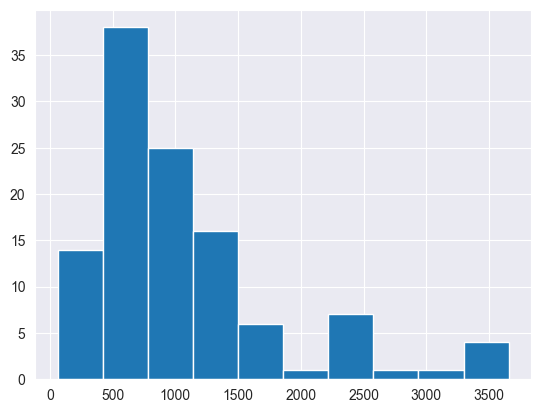

In [12]:
exps.apply(len).hist()

In [14]:
with open('summarized.json', 'w') as f:
    json.dump(summarized_exps, f, ensure_ascii=False)